In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from img2table.document import Image

In [2]:
#######################################################################
# Code just for displaying images in full size, remove for final code #
#######################################################################

import matplotlib.pyplot as plt

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

In [3]:
###################################################################################
#  Code just to visualize the content of extracted_tables, remove for final code  #
###################################################################################
def visualize_paper_content(orddict):
    k = 0
    fig, axs = plt.subplots(3, 13)
    for key, cell_list in orddict.items():
        for cell in cell_list:
            x1 = cell.bbox.x1
            y1 = cell.bbox.y1
            x2 = cell.bbox.x2
            y2 = cell.bbox.y2

            new_im = img.crop((x1, y1, x2, y2))
            ax = axs[k // 13, k % 13]  # Get the appropriate subplot axes
            ax.imshow(new_im)
            ax.axis('off')  # Optional: Turn off the axis labels
            k += 1
    plt.tight_layout()
    plt.show()

In [12]:
src = "D:/AJAYMON/AJAY/Programming/S6_Mini_Project/Codes/Image 2 Table/ad_cut.jpg"

model = tf.keras.models.load_model("D:/AJAYMON/AJAY/Programming/S6_Mini_Project/Codes/Neural Network/MP_None_Set.h5")

In [13]:
# Dictionary for storing marks of each papers
my_dict = {'1a': [], '1b': [], '1c': [], '2a': [], '2b': [], '2c': [], '3a': [], '3b': [], '3c': [], '4a': [], '4b': [], '4c': [], '5a': [], '5b': [], '5c': [], '6a': [], '6b': [], '6c': [], '7a': [], '7b': [], '7c': [], '8a': [], '8b': [], '8c': [], '9a': [], '9b': [], '9c': [], '10a': [], '10b': [], '10c': [], '11a': [], '11b': [], '11c': [], '12a': [], '12b': [], '12c': []}

In [14]:
# To extract cell bbox using img2table lib
doc = Image(src)
extracted_tables = doc.extract_tables(implicit_rows=False, min_confidence=50)

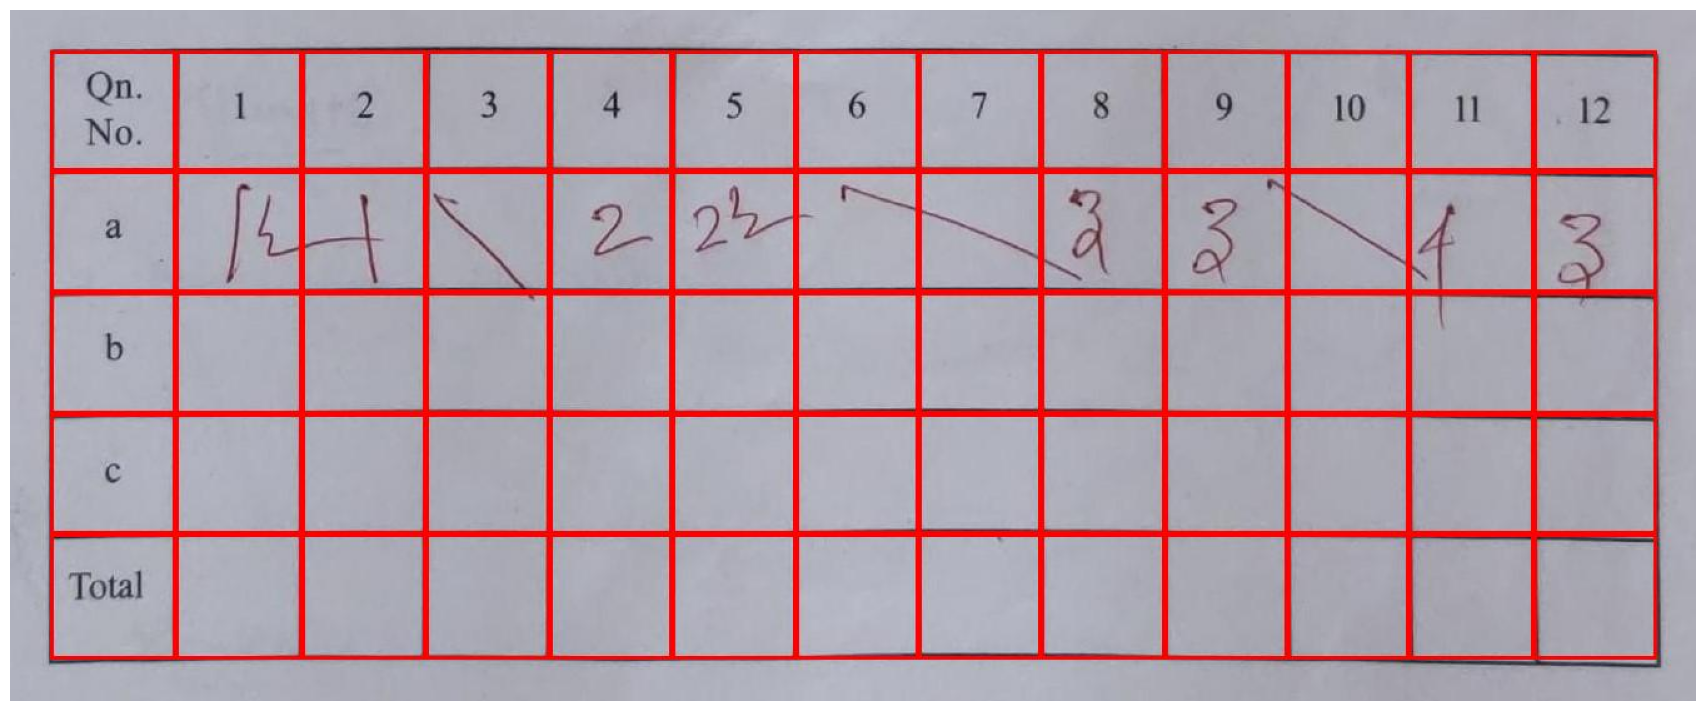

In [15]:
############################################################################################################
#  Code just to visualize the table recognition using contents in extracted_tables, remove for final code  #
############################################################################################################

from PIL import Image as PIL_Image, ImageDraw
import matplotlib.pyplot as plt

# Load the image using PIL
img = PIL_Image.open(src)

# Create a draw object
draw = ImageDraw.Draw(img)

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            draw.rectangle((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2), outline="red", width=3)
            
img.save("temp/img3.jpg")
display("temp/img3.jpg")

In [16]:
def classify_image(image):
    """
    Classify the image to numbers from 0 to 8, 8 is None
    
    Parameter
    ---------
    image: ndarray of a single channel image.
    
    Return
    ------
    pred: classified value corresponding to input image
    
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (40, 40)) # 40x40 pixels is the input shape of model

    # Expand the dimensions of the image to match the input shape of the model
    im = np.expand_dims(resized, axis=0)

    result = model.predict(im)
    pred = np.argmax(result[0])

    return pred

In [17]:
def cell_extraction_classification_df_return(orddict):
    """
    Extracts cells of the image from the bbox values in orddict,
    classify the image using our custom ocr model, and returns the result as a dataframe
    
    Parameter
    ---------
    orddict: ordered Dictionary having 4 values of bbox
    
    Return
    ------
    df: dataframe of classified values
    
    """
    del orddict[0], orddict[4] # del the first and last keys (rows) of orddict
    pred = []
    for key, cell_list in orddict.items(): # do the bbox extrn and classification using our model
        for cell in cell_list:
            x1 = cell.bbox.x1
            y1 = cell.bbox.y1
            x2 = cell.bbox.x2
            y2 = cell.bbox.y2

            new_im = img.crop((x1, y1, x2, y2))
            im_arr = np.array(new_im) # Converting new_im (PIL.Image.Image) to numpy array for predict_image()
            pred.append(classify_image(im_arr)) # custom ocr model is used here
    pred = [0 if num == 8 else num for num in pred] # changing None value predictions to 0
    pred_arr = np.array(pred)
    reshaped_pred_arr = pred_arr.reshape(3, 13) # 3 rows and 13 columns
    df = pd.DataFrame(reshaped_pred_arr)
    return df

In [18]:
def dataframe_post_processing(paper_df):
    """
    Preprocessing the dataframe - removing first column,
    flattening the np.array of df column-wise,
    and returns the values to be added to main mark-dictionary
        
    Parameter
    ---------
    paper_df: Output of cell_extraction_classification_df_return(), df with the unwanted first column
    
    Return
    ------
    cell_vals: Values to be added to main mark-dictionary
    
    """
    paper_df = paper_df.iloc[: , 1:] # iloc[row, column], removing first column

    # Flattening & adding marks to my_dict
    paper_arr = paper_df.to_numpy()
    flat = paper_arr.flatten(order='F') # F - flattening column-wise
    cell_vals = [i for i in flat]

    return cell_vals

In [19]:
orddict = extracted_tables[0].content
orddict

OrderedDict([(0,
              [TableCell(bbox=BBox(x1=32, y1=33, x2=132, y2=129), value=None),
               TableCell(bbox=BBox(x1=132, y1=33, x2=233, y2=129), value=None),
               TableCell(bbox=BBox(x1=233, y1=33, x2=332, y2=129), value=None),
               TableCell(bbox=BBox(x1=332, y1=33, x2=431, y2=129), value=None),
               TableCell(bbox=BBox(x1=431, y1=33, x2=529, y2=129), value=None),
               TableCell(bbox=BBox(x1=529, y1=33, x2=628, y2=129), value=None),
               TableCell(bbox=BBox(x1=628, y1=33, x2=726, y2=129), value=None),
               TableCell(bbox=BBox(x1=726, y1=33, x2=824, y2=129), value=None),
               TableCell(bbox=BBox(x1=824, y1=33, x2=923, y2=129), value=None),
               TableCell(bbox=BBox(x1=923, y1=33, x2=1021, y2=129), value=None),
               TableCell(bbox=BBox(x1=1021, y1=33, x2=1118, y2=129), value=None),
               TableCell(bbox=BBox(x1=1118, y1=33, x2=1218, y2=129), value=None),
               Tabl

In [13]:
if len(orddict.keys()) == 5 and sum(len(value) for value in orddict.values())== 65: # if the table recognition is correct, the no of rows will be 5
    paper_df = cell_extraction_classification_df_return(orddict)
    marks_for_main_dict = dataframe_post_processing(paper_df)
    
    for key, value in zip(my_dict.keys(), marks_for_main_dict):
        my_dict[key].append(value) # Adding values to dictionary
    
else: # if the table recognition is incorrect
    for key in my_dict.keys():
        my_dict[key].append(0) # Adding values to dictionary

1/1 [==============================] - 0s 18ms/step


In [14]:
my_dict

{'1a': [6],
 '1b': [0],
 '1c': [0],
 '2a': [1],
 '2b': [0],
 '2c': [0],
 '3a': [3],
 '3b': [0],
 '3c': [0],
 '4a': [2],
 '4b': [0],
 '4c': [0],
 '5a': [3],
 '5b': [0],
 '5c': [0],
 '6a': [7],
 '6b': [0],
 '6c': [0],
 '7a': [7],
 '7b': [0],
 '7c': [0],
 '8a': [3],
 '8b': [0],
 '8c': [0],
 '9a': [3],
 '9b': [0],
 '9c': [0],
 '10a': [5],
 '10b': [0],
 '10c': [0],
 '11a': [1],
 '11b': [2],
 '11c': [0],
 '12a': [3],
 '12b': [0],
 '12c': [0]}

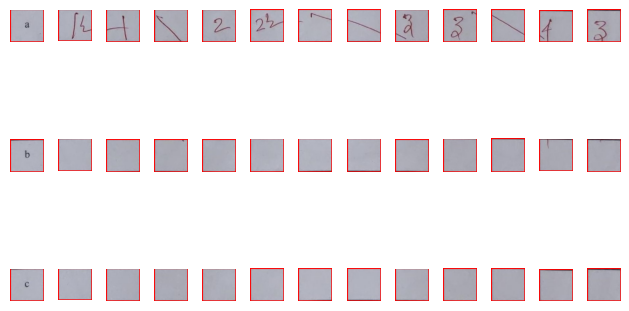

In [15]:
visualize_paper_content(orddict)